# Final Project - DTSA5509 Introduction to Machine Learning: Supervised Learning. 

### In this final project, I will perform credit scoring for credit card application as a suppervised learning problem. The objective to help the bank to classify credit card customer he classification will ebnabkle the bacnkThie is will help the nback to mank to access creditworthiness from the large volume of the applicants, help to prevent and reduce potential loss from high risk customer. 

### The dataset consists of 2 csv files.There're two tables could be merged by ID.

####  Application_record, it is the customer informaion which contains.
- ID: Client identification number
- CODE_GEN: Client gender 
- FLAG_OWN_CAR: Is there a car?
- FLAG_OWN_REALTY: Is there a property?
- CNT_CHILDREN: Number of children
- AMT_INCOME_TOTAL: Total annual income
- NAME_INCOME_TYPE: Income category
- NAME_EDUCATION_TYPE: Education level of the client
- NAME_FAMILY_STATUS: Marital status
- NAME_HOUSING_TYPE: Type of living
- DAYS_BIRTH: Count backwards from current day (0), -1 means yesterday
- DAYS_EMPLOYED: Count backwards from current day(0). If positive, it means the person currently unemployed.
- FLAG_MOBIL: Is there a mobile phone?
- FLAG_WORK_PHONE: Is there a work phone?
- FLAG_PHONE: Is there a phone?
- FLAG_EMAIL: Is there any email?
- OCCUPATION_TYPE: Occupation of the client
- CNT_FAM_MEMBERS: Size of the Family

#### Credit_records, It is credit perfomance information of the customer based on day past due. The table contains;
- ID: Client identification number
- MONTH_BALANCE: The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
- STATUS: 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

## Here is my outline of the process that I plan to develop in the notebook.
- Step 0: Load required libaries
- Step 1: Load Data and Exploratory Data Analysis (EDA)¶
    - 1.1 Load the Application data and perform basic checking
    - 1.2 Remove dupplicate record of the Application Data
    - 1.3 Load the credit_card data and perform basic checking
    - 1.4 Transform Target data based on defualt definetion
    - 1.5 Perform data aggregation
    - 1.6 Merge Applicaton data and credit information
    - 1.7 Checking Missing Value and hendle it 
    - 1.8 Examine Numerical data and handle it
    - 1.9 Examine Catagorical data and handle it
- Step 2: Perform Factor Analysis, Tranformation and Reduction
    - 2.1 Perform Information Value Analysis (IV)
    - 2.2 Perform classing (Binning)
    - 2.3 Apply WoE Tranformation
    - 2.4 Perform corealelation check to prevent multicollinearity
    - 2.5 Apply SMOTE for the imbalance class
- Step 3: Model Development
    - 3.1 Develop the first model Logistic Regression
- Step 4: Logistic Regression Evaluate the model
    - 4.1 Evaluate with the matric Accuracy, ROC-AUC and F1
    - 4.2 Confusion Matrix
    - 4.3 Plot the ROC Curve
- Step 5: Develop the challenger Model
    - 5.1 Develop Random Forest model
- Step 6: Random Forest model Eveluation
    - 6.1 Evaluate with the matric Accuracy, ROC-AUC and F1
    - 6.2 Confusion Matrix
    - 6.3 Plot the ROC Curve- Step 7:  decisions.
Discussion    - 7.1 /Conclusion:
Summarize
    - 7.2 key findings.
Discuss the model's limitations a
    - 7.3 d assumptions.
Propose future work or improvements.

## Step 0: Load required libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, roc_curve, accuracy_score, auc
import statsmodels.api as sm
import scipy.stats as stats
import scorecardpy as sc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

## Step 1: Load and Exploratory Data Analysis (EDA)

### 1.1 Load the Application data and perform basic checking

In [2]:
## Load and Exploration Application Data
application_record = pd.read_csv('application_record.csv')
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [3]:
## Check the number of record
application_record.shape

(438557, 18)

In [4]:
## Check basic info of the Application Data
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

### 1.2 Remove duplicate record of the Application Data
Based on the nature of application record, it should be unique because it refers to the inividual's customer information based on thier application. So, in this step we will check weather the data contains the duplication and then we will remove it. 

In [5]:
## Check uniqueness for the ID column and remove dupplicate record of the Application Data
application_record['ID'].duplicated().sum()

47

In [6]:
application_record = application_record.drop_duplicates(subset='ID',keep='first')

In [7]:
## RE-Check the number of record
application_record.shape

(438510, 18)

### 1.3 Load the credit_card data and perform basic checking

In [8]:
## Load and Exploration Credit Record Data
credit_record = pd.read_csv('credit_record.csv')
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [9]:
# Check for Credit Record Table Data Size
credit_record.shape

(1048575, 3)

In [10]:
## Check basic info of the Application Data
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [11]:
## Check the data duplication 
credit_record.duplicated().sum()

0

In [12]:
## Check number of ID Uniquesness 
credit_record['ID'].nunique()

45985

### 1.4 Transform Target data based on default defintionn
Tranform credit record based on defualt definetion. I would define the default defination based on normal banking practice here;If the customer is past due more than 90 days (3 months delinquent). Please do note that if it's already paid off or on loan at the month. It will be considered as good. 

#### Refer to data dicctionary of the STATUS: 
- 0: 1-29 days past due
- 1: 30-59 days past due
- 2: 60-89 days overdue
- 3: 90-119 days overdue
- 4: 120-149 days overdue
- 5: Overdue or bad debts, write-offs for more than 150 days
- C: paid off that month
- X: No loan for the month.
  
Therfore, I would tranform STATUS - 0,1,2,C and X as a performing loan (0), and 4-5 as non-performing loan (1).

In [13]:
credit_record['target']=credit_record['STATUS']
credit_record['target'].replace('1', 0, inplace=True)
credit_record['target'].replace('2', 0, inplace=True)
credit_record['target'].replace('X', 0, inplace=True)
credit_record['target'].replace('C', 0, inplace=True)
credit_record['target']=credit_record['target'].astype(int)
credit_record.loc[credit_record['target']>=1,'target']=1

C:\Users\t_car\AppData\Local\Temp\ipykernel_3188\1082534220.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_record['target'].replace('1', 0, inplace=True)
C:\Users\t_car\AppData\Local\Temp\ipykernel_3188\1082534220.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

### 1.5 Perform data aggregation
Group the record based on customer ID. If there are any default records under the cutomer ID, it considers as a default customer.

In [15]:
## Check uniqueness for the ID column and remove dupplicate record of the Application Data
credit_record=pd.DataFrame(credit_record.groupby(['ID'])['target'].agg("max")).reset_index()

In [16]:
credit_record["target"].value_counts()

target
0    45654
1      331
Name: count, dtype: int64

### 1.6 Merge Application data and credit information

In [17]:
df = pd.merge(application_record, credit_record, how='inner', on=['ID'])

In [19]:
df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0


In [20]:
# Perform data exploration 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [21]:
# Perform data exploration 
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,0.008284
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,0.090638
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


### 1.7 Checking Missing Value and handle it

In [22]:
# Check missing value
print(df.isnull().sum())

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
target                     0
dtype: int64


### Handle Missing Value by replacement
#### There are 11,323 null records in OCCUPATION_TYPE, so I will replace it with "non-specified".

In [23]:
df['OCCUPATION_TYPE'].fillna('non-specified',inplace=True)

C:\Users\t_car\AppData\Local\Temp\ipykernel_3188\3518268457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna('non-specified',inplace=True)


In [24]:
# Re-Check missing value
print(df.isnull().sum())

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
target                 0
dtype: int64


### 1.8 Examine numerical data and handle it

In [25]:
## List the numerical features.
numeric_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

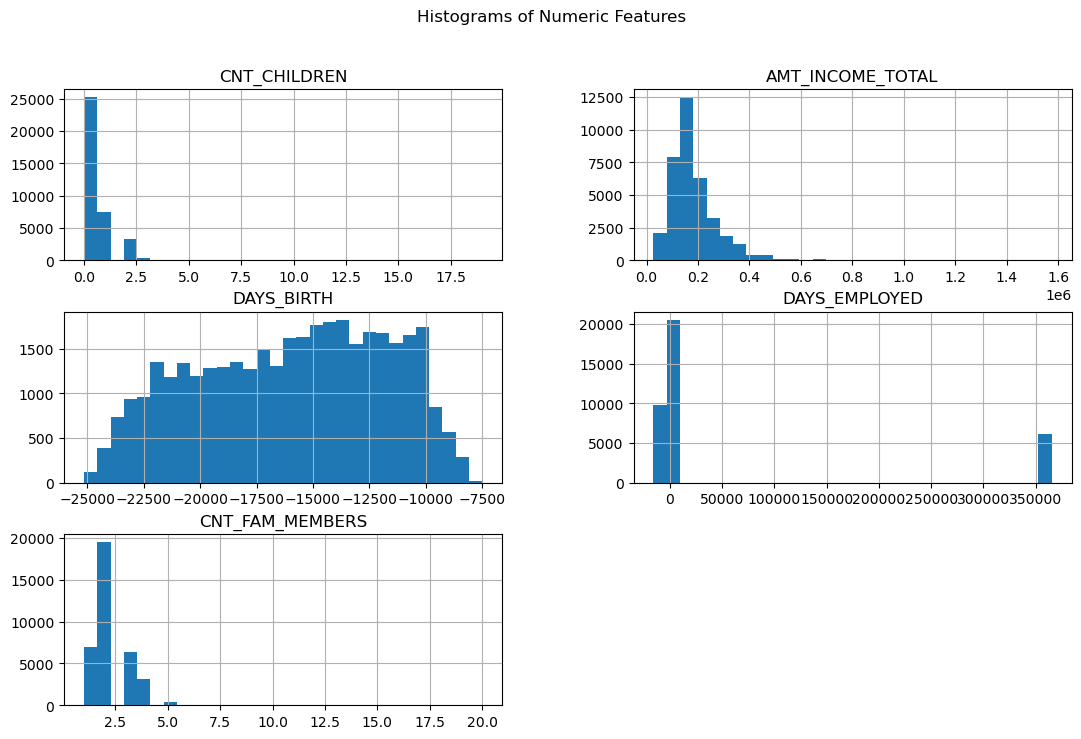

In [26]:
## Plot Histograms for numeric features
df[numeric_cols].hist(bins=30, figsize=(13, 8))
plt.suptitle('Histograms of Numeric Features')
plt.show()

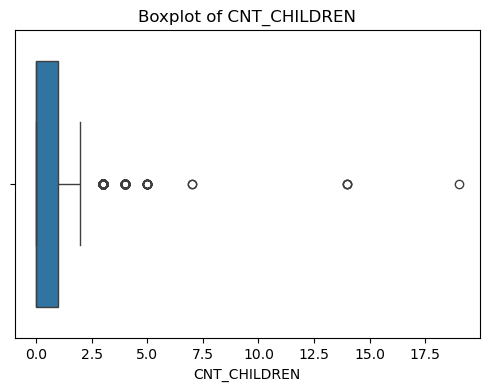

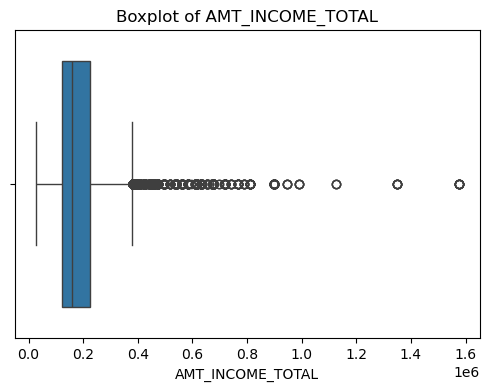

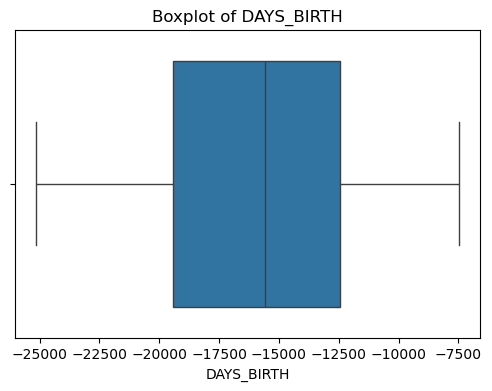

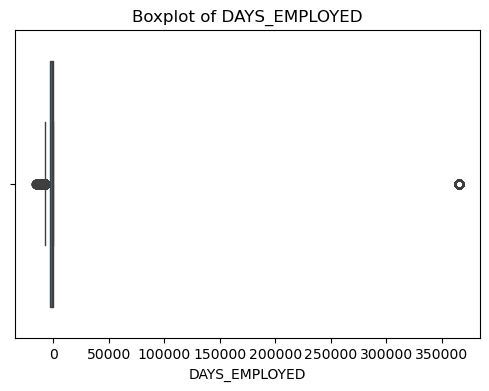

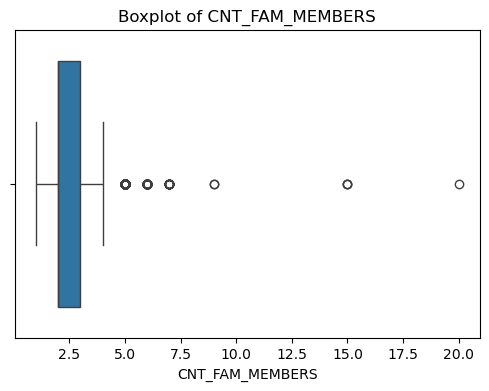

In [27]:
# Boxplots to identify outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#### The outlier of DAYS_EMPLOYED can be detected from the plot. I checked the data dict for DAYS_EMPLOYED definetion agian and I found that DAYS_EMPLOYED: Count backwards from current day(0). If positive, it means the person currently unemployed. SO, we will find the outlier and find the way to handle it.

In [28]:
## Identify the outlier and count it.
df[df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
365243    6135
Name: count, dtype: int64

### Handle deteccted outlier Value by replacing with proper value.
As checking, there are 6135 records fo 365243. Per the data dict,if DAYS_EMPLOYED is negative, refer to unemploy. So, I will convert those value to be 0. 

In [29]:
df['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

C:\Users\t_car\AppData\Local\Temp\ipykernel_3188\1132558553.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DAYS_EMPLOYED'].replace(365243,0,inplace=True)


In [32]:
#df.head(10)

### Convert DAYS_EMPLOYED and DAYS_BIRTH to Year

In [33]:
df['AGE']=round(-df['DAYS_BIRTH']/365,0)
df['YEARS_EMPLOYED']=round(-df['DAYS_EMPLOYED']/365)
df.loc[df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
df.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

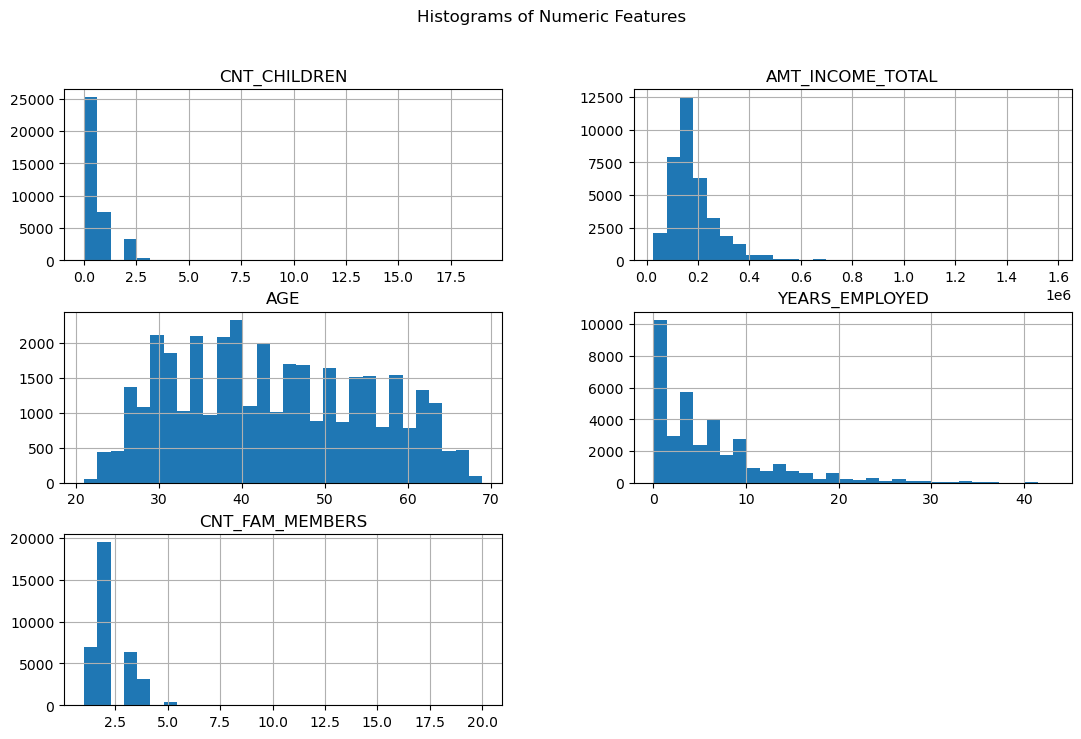

In [34]:
## List the numerical features.
numeric_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

## Plot Histograms for numeric features
df[numeric_cols].hist(bins=30, figsize=(13, 8))
plt.suptitle('Histograms of Numeric Features')
plt.show()

### 1.9 Examine Categorical data and handle it

In [37]:
# Categorical columns
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 
                    'FLAG_PHONE', 'FLAG_EMAIL']

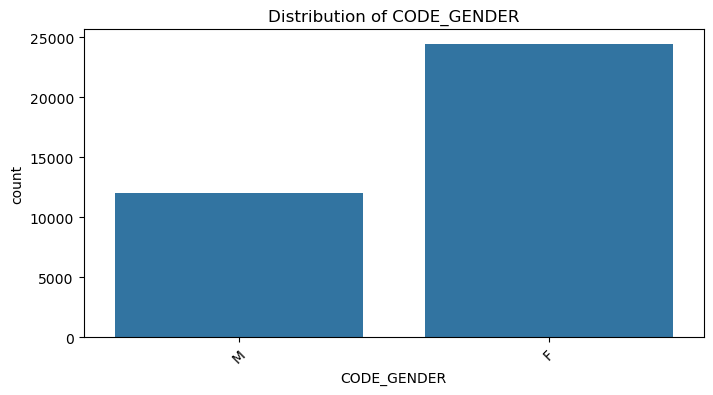

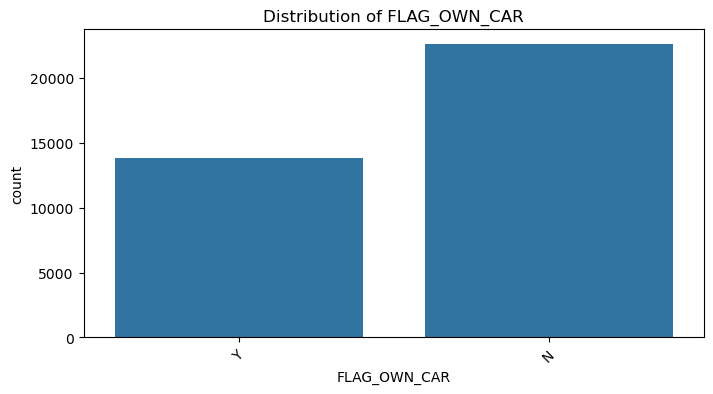

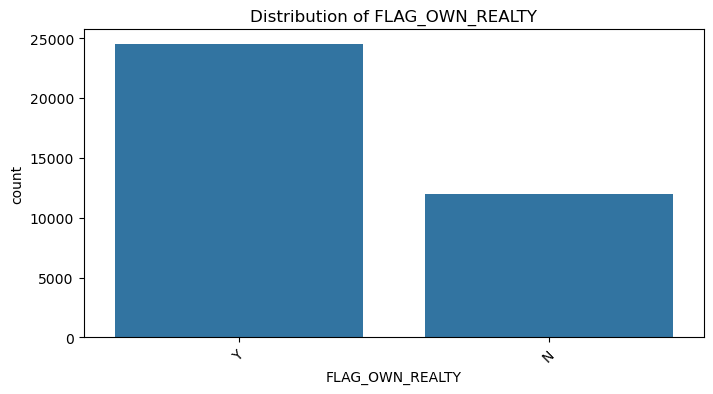

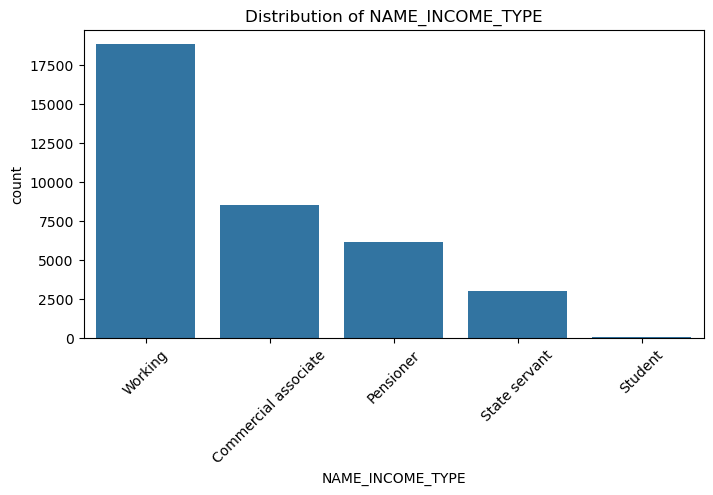

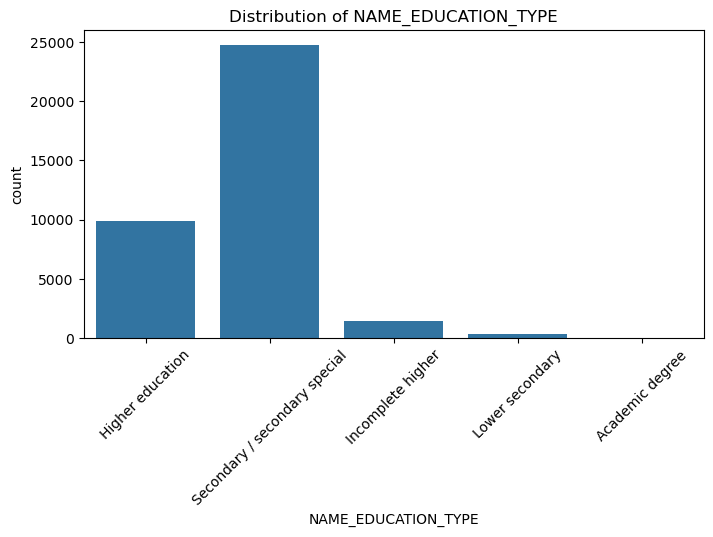

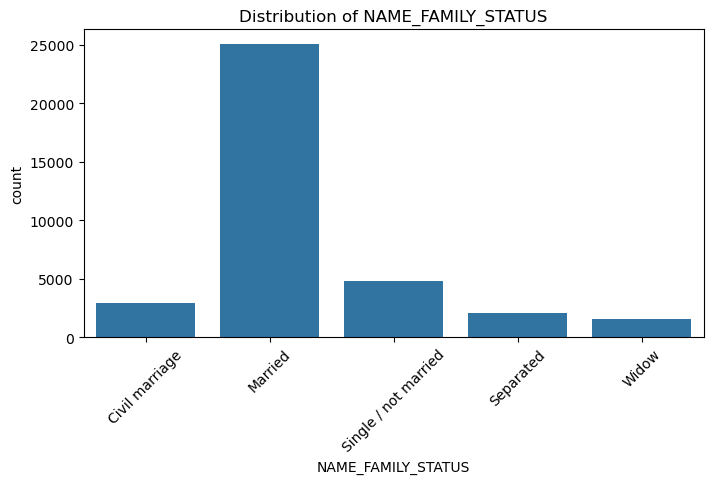

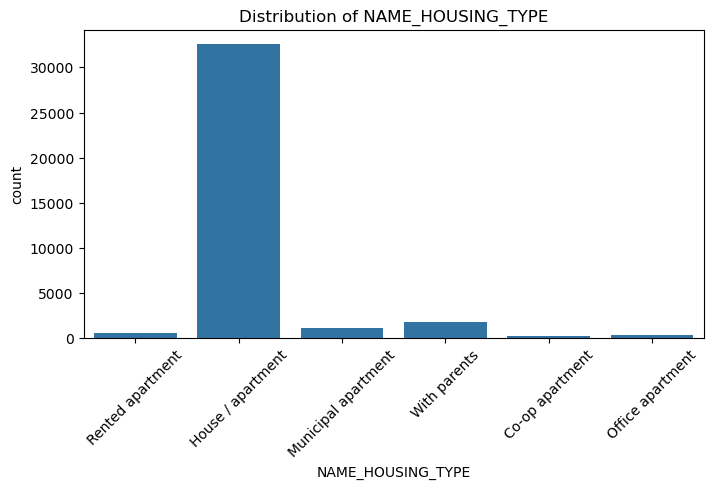

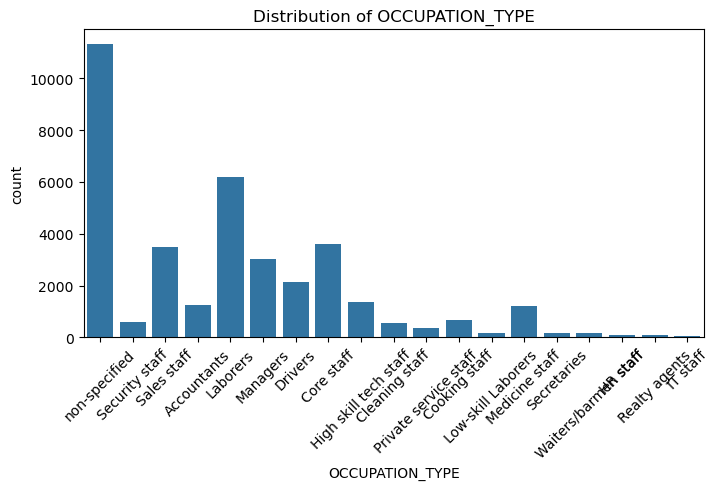

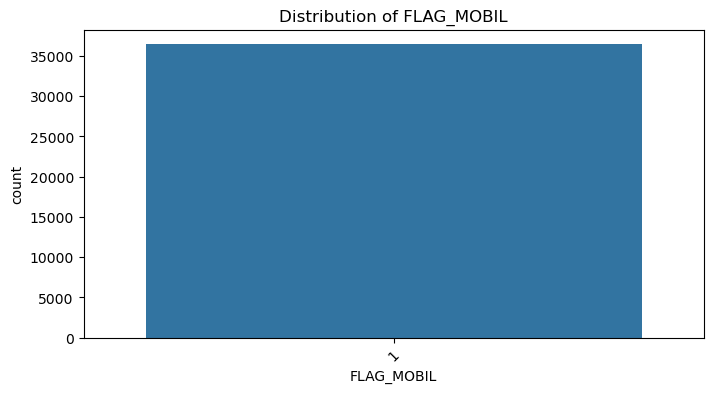

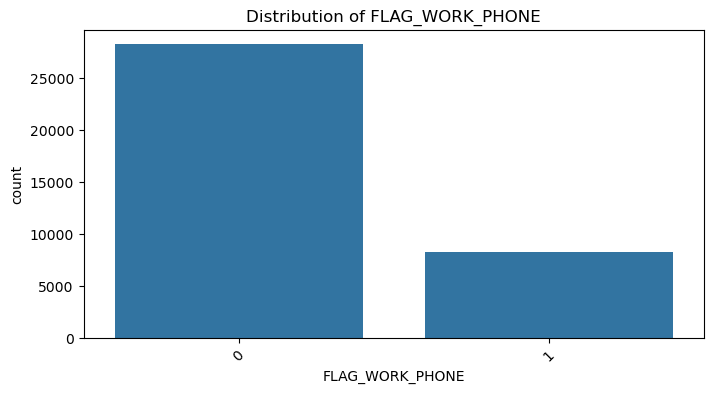

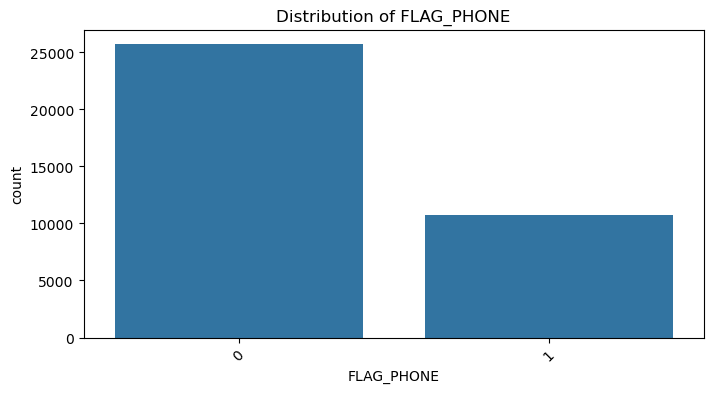

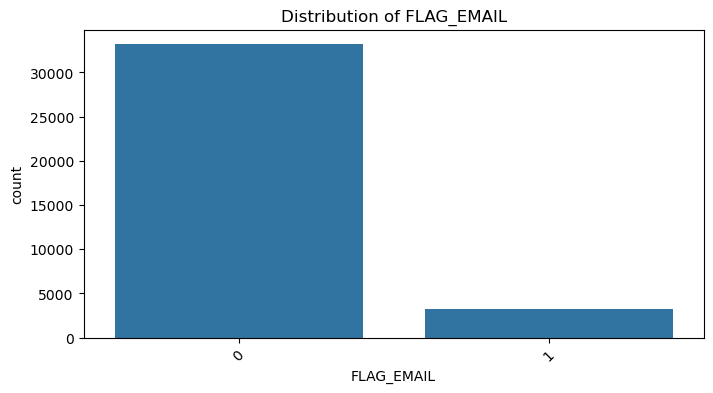

In [38]:
# Bar plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

#### After examine the catagorical data, we found that every customer has mobile as all record FLAG_MOBIL = 1. So, I will drop this feature because there are no different from each other which no contribution to the model.

In [39]:
df = df.drop('FLAG_MOBIL', axis=1)

In [42]:
### Re-check data again.
#df.info()
#print(df.isnull().sum())
#df.describe()

In [41]:
df["target"].value_counts()

target
0    36155
1      302
Name: count, dtype: int64

## Step 2: Perform Factor Analysis, Transformation and Reduction

### 2.1: Perform Information Value Analysis (IV)

In [43]:
# Split data into features and target
features = df.columns[df.columns != 'target']
target = 'target'

In [44]:
# Calculate WoE and binning information
bins = sc.woebin(df, y=target)

[INFO] creating woe binning ...


C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\condition_fun.py:131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  dat.loc[:,y] = dat[y].apply(lambda x: x if pd.isnull(x) else int(x)) #dat[y].astype(int)
C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime w

In [45]:
# Extracting IV for each variable from the bins
# bins is a dictionary with keys as variable names and values as DataFrames containing binning results
iv_dict = {}
for key, dataframe in bins.items():
    # The 'total_iv' from the last row of each binning DataFrame contains the IV for the variable
    iv_dict[key] = dataframe['total_iv'].values[-1]  # Ensure this key exists in your DataFrame

In [46]:
# Create a DataFrame from the dictionary to view IV values
iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV']).reset_index()
iv_df.rename(columns={'index': 'Variable'}, inplace=True)

In [48]:
iv_df

,Variable,IV
0,CNT_FAM_MEMBERS,0.017515
1,NAME_HOUSING_TYPE,0.039364
2,AMT_INCOME_TOTAL,0.077314
3,NAME_FAMILY_STATUS,0.092021
4,NAME_INCOME_TYPE,0.051452
5,FLAG_OWN_CAR,0.002825
6,FLAG_WORK_PHONE,0.001490
7,CODE_GENDER,0.013040
8,NAME_EDUCATION_TYPE,0.022593
9,AGE,0.104023


### Information Value (IV) is used to evaluate the predictive power of a categorical or binned continuous variable. It can be intepreted as follows; 
- IV < 0.02: Predictive power is considered weak.
- 0.02 ≤ IV < 0.1: Predictive power is considered medium.
- 0.1 ≤ IV < 0.3: Predictive power is considered strong.
- IV ≥ 0.3: Predictive power is considered very strong.

In [49]:
# Filter out features with IV less than 0.02
low_iv_features = iv_df[iv_df['IV'] < 0.02]['Variable'].tolist()
#print("Features to remove due to low IV (< 0.01):", low_iv_features)

In [50]:
data_cleaned = df.drop(columns=low_iv_features)

In [51]:
data_cleaned.head(10)

,ID,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,target,AGE,YEARS_EMPLOYED
0,5008804,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,non-specified,0,33.0,12.0
1,5008805,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,non-specified,0,33.0,12.0
2,5008806,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,59.0,3.0
3,5008808,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,52.0,8.0
4,5008809,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,52.0,8.0
5,5008810,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,52.0,8.0
6,5008811,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,52.0,8.0
7,5008812,Y,283500.0,Pensioner,Higher education,Separated,House / apartment,non-specified,0,62.0,0.0
8,5008813,Y,283500.0,Pensioner,Higher education,Separated,House / apartment,non-specified,0,62.0,0.0
9,5008814,Y,283500.0,Pensioner,Higher education,Separated,House / apartment,non-specified,0,62.0,0.0


### 2.2 Perform classing (Binning)

In [52]:
# Perform initial Fine Classing
bins_fine = sc.woebin(df, y='target', max_num_bin=10)  # start with a higher number of bins

# Review the fine classing results
for var in bins_fine:
    print(f"Binning for {var}:")
    print(bins_fine[var])
    print("\n")

[INFO] creating woe binning ...


C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\condition_fun.py:131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  dat.loc[:,y] = dat[y].apply(lambda x: x if pd.isnull(x) else int(x)) #dat[y].astype(int)
C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime w

Binning for CNT_FAM_MEMBERS:
          variable         bin  count  count_distr   good  bad   badprob  \
0  CNT_FAM_MEMBERS  [-inf,2.0)   6987     0.191650   6914   73  0.010448   
1  CNT_FAM_MEMBERS   [2.0,3.0)  19463     0.533862  19306  157  0.008067   
2  CNT_FAM_MEMBERS   [3.0,4.0)   6421     0.176125   6374   47  0.007320   
3  CNT_FAM_MEMBERS   [4.0,inf)   3586     0.098362   3561   25  0.006972   

        woe    bin_iv  total_iv breaks  is_special_values  
0  0.234299  0.011830  0.017515    2.0              False  
1 -0.026782  0.000378  0.017515    3.0              False  
2 -0.124691  0.002577  0.017515    4.0              False  
3 -0.173777  0.002730  0.017515    inf              False  


Binning for NAME_HOUSING_TYPE:
            variable                                                bin  \
0  NAME_HOUSING_TYPE                   With parents%,%House / apartment   
1  NAME_HOUSING_TYPE  Rented apartment%,%Office apartment%,%Co-op ap...   

   count  count_distr   good  b

C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version o

#### Based on the result above, I decided to perform manually binning adjustment with two factors;
- AGE: There is a variability across bins and WoE varies significantly from bin to bin.
- YEARS_EMPLOYED: WoE increasing trend.

In [53]:
### Manually Classing
breaks = {
    'AGE':[-float('inf'), 30, 40, 50, 60, float('inf')],  
    'YEARS_EMPLOYED':  [-float('inf'), 5, 15, 25, float('inf')]
}
bins = sc.woebin(df, y='target', breaks_list=breaks)

C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\condition_fun.py:131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  dat.loc[:,y] = dat[y].apply(lambda x: x if pd.isnull(x) else int(x)) #dat[y].astype(int)


[INFO] creating woe binning ...


C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\t_car\anaconda3\envs\study\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, fallin

### 2.3 Apply WoE Tranformation 

In [54]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply WoE transformation
train_woe = sc.woebin_ply(X_train, bins)
test_woe = sc.woebin_ply(X_test, bins)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


### 2.4 Perform correlation check to prevent multicollinearity

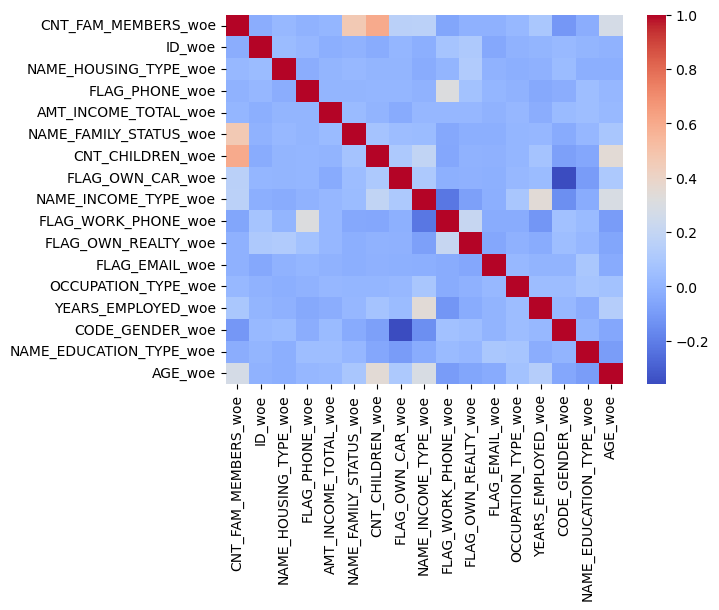

In [55]:
# Check correlations
corr_matrix = train_woe.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [56]:
# Identify highly correlated variables (greater than 0.5)
high_corr_vars = {corr_matrix.columns[x]: corr_matrix.columns[y] for x in range(len(corr_matrix.columns)) for y in range(x+1, len(corr_matrix.columns)) if abs(corr_matrix.iloc[x, y]) > 0.5}
high_corr_vars

{'CNT_FAM_MEMBERS_woe': 'CNT_CHILDREN_woe'}

In [57]:
# Remove highly correlated variables
train_woe = train_woe.drop(columns=high_corr_vars.keys())
test_woe = test_woe.drop(columns=high_corr_vars.keys())

### 2.5 Apply SMOTE for the imbalance class

In [58]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(train_woe, y_train)

## Step 3: Model Development

### 3.1 Develop the first model Logistic Regression

In [59]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

## Step 4: Model Evaluation

In [60]:
# Predict on the test set
y_pred = model.predict(test_woe)

### 4.1 Evaluate with the matric Accuracy, ROC-AUC and F1

In [61]:
# Evaluate the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [62]:
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.6515359297860669
ROC-AUC: 0.6176605926743972
F1-Score: 0.0215633423180593


### 4.2 Confusion Matrix

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[4723, 2521],
       [  20,   28]], dtype=int64)

### 4.3 Plot the ROC Curve

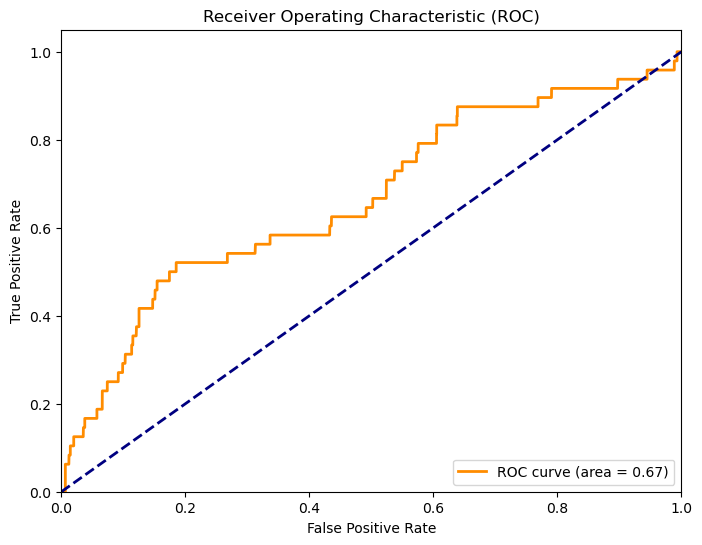

In [64]:
# Predict probabilities
y_pred_prob = model.predict_proba(test_woe)[:, 1]

# Calculate true positives, false positives, threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under Curve)
roc_auc_value = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Step 5: Develop the challenger Model

### 5.1 Develop the challenger model Random Forest

In [65]:
# Train Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

## Step 6: Random Forest model Evaluation

### 6.1 Evaluate with the matric Accuracy, ROC-AUC and F1

In [66]:
# Drop CNT_CHILDREN_woe from the test set
X_test_woe = sc.woebin_ply(X_test, bins)
X_test_woe = X_test_woe.drop(columns=['CNT_FAM_MEMBERS_woe'])

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_woe)

[INFO] converting into woe values ...


In [67]:
# Evaluate the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest ROC-AUC: {roc_auc_rf}")
print(f"Random Forest F1 Score: {f1_score_rf}")

Random Forest Accuracy: 0.9912232583653319
Random Forest ROC-AUC: 0.6541102981778023
Random Forest F1 Score: 0.3191489361702128


### 6.2 Confusion Matrix

In [68]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
conf_matrix

array([[7213,   31],
       [  33,   15]], dtype=int64)

### 6.3 Plot the ROC Curve

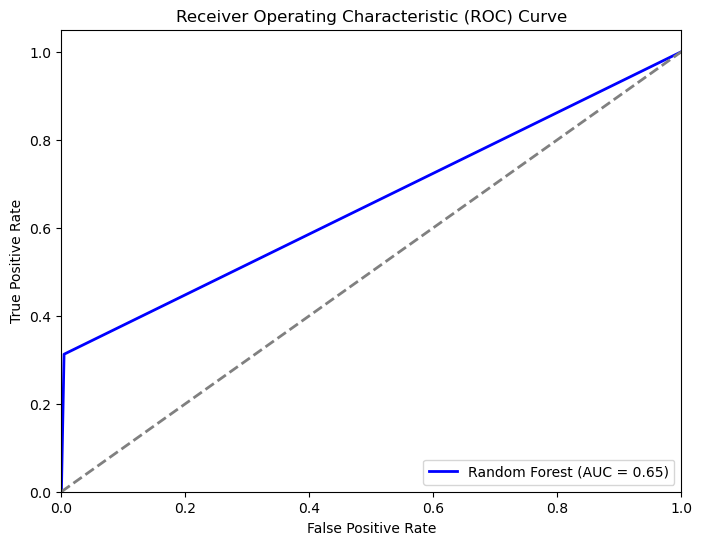

In [69]:
# Compute ROC curve and ROC area for the random forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Step 7: Discussion/Conclusion:

### 7.1 Summarize key findings.
- There are two data application data and credit data. The application data contains the features that we can use to predict the outcome and credit data contain the target. However, I have to perform some data processing such as deduplicate or data aggregration before merging these two data sets.
- I have to tranform original target feature to be binary (Defualt/non-defualt) based on definetion.
- The data contain missing value and outlier that I need to clean it before process.
- I have perform factor analysis to select the features the process include IV (information Value) to check which feature has more power of prediction, perform corealation check to prevent multicolinearity, and classing to group the data.
- I fouond that the data is very imbalance.So, I try to handle it by using SMOTE method to syntetic oversampli data.
- Then, I train two model Logistic Regression and Random Forest and compare the performance.
- Based on perfomance comparison, the random forest perform better than logistic regression due to Accuracy, ROC-AUC and F1. This is an imbalance case, so I more focus on F1 score. Actually, both model is not perform well. There is a room for improvemenet.

### 7.2 Discuss the model's limitations and assumptions.
- Based on the results, the perfomance of both model are poor which might cuase from the imbalance data. Even I try to overcome by using SMOTE method and look into F1 score. 

### 7.3 Propose future work or improvements.
- To improve model in the future, I will try to check the data leakage and remove it from model.
- Try other method to overcome imbalance class.
- Try another model to improve F1 score.